In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
from scipy.special import expit
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetai = 0.8
funcreturned = ret_alpha_beta_Ev(thetai)
alpha, beta = funcreturned[0]  #Note NO NEED to multiply 0.5 to the values in the returned alphabeta
Ev = funcreturned[1]
thetarad = thetai * IN_RADIAN

verbose_string = funcreturned[2]
print("verbose_string is ", verbose_string)

BW = 3.0 #consider a rough estimate of the bandwidth to be 3eV
Eset = BW*np.logspace(-12,0,13*10000)
print(Ev)

verbose_string is  (array([0.02371266, 0.03671387]), 222, 4)
0.0038836617935514403


### DoS 
#### The cone dos is $A x$, and the vhs dos is $P \log\left|\frac{B-E_v}{x-E_v}\right|$. They meet at the solution $x = E_*$ . 
The Dos then is 
$\left[\Theta(E) - \Theta(E - E_*)\right] A E + \Theta(E-E_*) P \log\left|\frac{B-E_v}{E-E_v}\right|$ 

Estar =  0.0031069294348411523
Ev =  0.0038836617935514403
DOS at zero energy:  4.950874396509666e-09
DOS at the Band edge is  0.0


(0.0, 0.1)

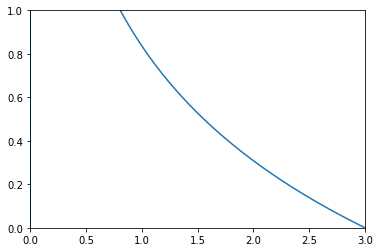

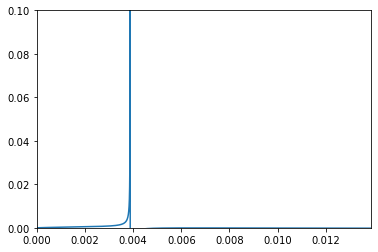

In [12]:
A = DiracConeDoS_TBLG(1, thetarad)
P = (12/(4*np.pi**2)) * (1/(np.sqrt(np.abs(alpha*beta))))

eps = 1e-2
def forbisection(x,A,P,BW,Ev):
    return A*x/P - (np.log(np.abs((BW-Ev)/(x-Ev))))

#Estar = bisect(forbisection,0+eps,Ev-eps,args=(A,P,BW,Ev))
#Estar = newton(forbisection,0,args=(A,P,BW,Ev))
Estar = 0.8*Ev
print("Estar = ",Estar)


#s = 50/(A * Estar)



DoS = np.array([np.exp(-mu/Estar) * A * np.abs(mu) + (1-np.exp(-mu/Estar)) * P *  np.log(np.abs((BW-Ev)/(mu-Ev))) for mu in Eset])

#startindex, stopindex = [100000,115000]
startindex, stopindex = [0,-1]
plt.plot(Eset[startindex:stopindex],DoS[startindex:stopindex])
print("Ev = ", Ev)
print("DOS at zero energy: ", DoS[0])

print("DOS at the Band edge is ", DoS[-1])
plt.ylim(0,1)
plt.xlim(0,3)
fig,ax = plt.subplots()
ax.plot(Eset[startindex:stopindex],np.gradient(DoS)[startindex:stopindex])
ax.set_xlim(0,Ev+0.01)
ax.set_ylim(0,0.1)


### Condition for root: Cone(Ev) > vhs(0)

In [4]:
#coneEv = A * np.abs(Ev)
#vhSzero = P * np.log(np.abs((BW-Ev)/(0-Ev)))
#coneEv - vhSzero

### Compare slopes at $E_*$

In [5]:
#X,Y,Z = data_for_contours(1.05)
#ser = pd.Series(Z.flatten())
#sns.kdeplot(ser,bw_adjust=0.01,clip=(0,0.001))

In [6]:
#X,Y,Z = data_for_contours(1.79)
#ser = pd.Series(Z.flatten())
#sns.kdeplot(ser,bw_adjust=0.01,clip=(0,0.050))

48.578087800140665 -1100.5594879665343 6227.899571591622
1073.3777562151663


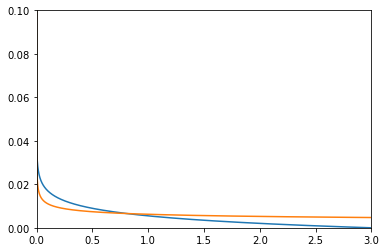

In [7]:
coefflist = [0.005]
gamma,kappa = np.load('gammakappa.npy')
alpha, beta = np.load('alphabeta.npy')[5]
alpha = 0.5*alpha
Gammatwidsquare = gamma**2 - 4*alpha*kappa 
pref = ((2*np.pi)**(-2.5)) * (GAMMA(0.25)**2) 
denom = (4.0*alpha*Gammatwidsquare)**0.25

for coeff in coefflist:
    plt.plot(Eset, coeff * np.log(BW/Eset))
plt.xlim(0,3)
plt.ylim(0,0.1)
#plt.plot(Eset, 1 * Eset**(-0.25))
plt.plot(Eset, (pref/denom) * Eset**(-0.25) )
print(alpha, gamma,kappa)
print(Gammatwidsquare)

0.052389584167551954


(0.0, 1.0)

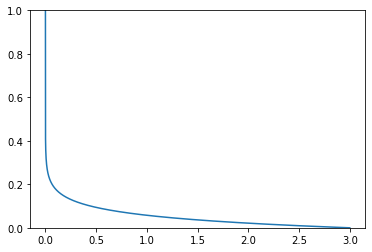

In [8]:
C = 12*pref/denom 
mtch = 0.001
G = (C*(mtch**-0.25))/(np.log(BW/mtch))
MagicDos = (np.exp(-Eset/mtch) * C * Eset**(-0.25)) + (1-np.exp(-Eset/mtch))*G*np.log(BW/Eset)
plt.plot(Eset,MagicDos)
print(G)
plt.ylim(0,1)


# PROD

In [2]:
BASE_PATH = "C:/Users/Aravi/OneDrive/Documents/DoS_Pass2/"
if not os.path.exists(BASE_PATH):
     raise(Exception("CHECK THE BASE PATH"))

BW = 3.0 #consider a rough estimate of the bandwidth to be 3eV
Eset = BW*np.logspace(-12,0,13*10000)
thetaiset = [0.8,0.85,0.9,0.95,1.0,1.1,1.15,1.2,1.25,1.4,1.5,1.6,1.8,2.0]
TOWRITE_X = np.concatenate((-np.flip(Eset),Eset))
for ival, thetai in enumerate(thetaiset):
    funcreturned = ret_alpha_beta_Ev(thetai)
    alpha, beta = funcreturned[0]  #Note NO NEED to multiply 0.5 to the values in the returned alphabeta
    Ev = funcreturned[1]
    thetarad = thetai * IN_RADIAN
    A = DiracConeDoS_TBLG(1, thetarad)
    P = (12/(4*np.pi**2)) * (1/(np.sqrt(np.abs(alpha*beta))))
    Estar = 0.8*Ev
    DoS = np.array([np.exp(-mu/Estar) * A * np.abs(mu) + (1-np.exp(-mu/Estar)) * P *  np.log(np.abs((BW-Ev)/(mu-Ev))) for mu in Eset])
    TOWRITE_Y = np.concatenate((np.flip(DoS),DoS))
    filename = os.path.join(BASE_PATH,str(ival)+'.csv')
    pathlogfile = os.path.join(BASE_PATH,str(ival)+'log.txt')
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(zip(TOWRITE_X,TOWRITE_Y))
    with open(pathlogfile,'w', newline = '') as f:
        f.write(str((int(thetai*100)/100,Ev)))

## Make sure to clear the Kernel before the next step

In [3]:
BASE_PATH = "C:/Users/Aravi/OneDrive/Documents/DoS_Pass2/"
if not os.path.exists(BASE_PATH):
     raise(Exception("CHECK THE BASE PATH"))

BW = 3.0 #consider a rough estimate of the bandwidth to be 3eV
Eset = BW*np.logspace(-12,0,13*10000)
thetai = 1.05


gamma,kappa = np.load('gammakappa.npy')
alpha, beta = np.load('alphabeta.npy')[5]
alpha = 0.5*alpha
Gammatwidsquare = gamma**2 - 4*alpha*kappa 
pref = ((2*np.pi)**(-2.5)) * (GAMMA(0.25)**2) 
denom = (4.0*alpha*Gammatwidsquare)**0.25
C = 12*pref/denom 
mtch = 0.001
G = (C*(mtch**-0.25))/(np.log(BW/mtch))
MagicDos = (np.exp(-Eset/mtch) * C * Eset**(-0.25)) + (1-np.exp(-Eset/mtch))*G*np.log(BW/Eset)

TOWRITE_X = np.concatenate((-np.flip(Eset),Eset))
TOWRITE_Y = np.concatenate((np.flip(MagicDos),MagicDos))

filename = os.path.join(BASE_PATH,'MAGIC'+'.csv')
pathlogfile = os.path.join(BASE_PATH,'MAGIC'+'log.txt')
with open(filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(zip(TOWRITE_X,TOWRITE_Y))
with open(pathlogfile,'w', newline = '') as f:
    f.write(str((1.05,0)))